## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #,Imputer 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, recall_score, precision_score, f1_score 

In [3]:
#Read dataset
df = pd.read_csv('datasetwithoutexploit.csv')

In [4]:
# Groupement des classes
attack_group = {'Infilteration': 'Web attack', 
                'Fuzzers': 'Web attack',
                'Generic': 'Web attack',
                'injection': 'Web attack', 
                'Analysis': 'Web attack',
                'xss': 'Web attack',
                'Benign': 'BENIGN',
                'backdoor': 'BACKDOOR', 
                'scanning': 'SCANNING',
                'mitm': 'MITM', 
                'dos': 'DOS', 
                'ddos': 'DDOS', 
                'bruteforce': 'BRUTEFORCE', 
                'Theft': 'THEFT', 
                'Reconnaissance': 'RECON',
                'Shellcode': 'SHELLCODE',
                'ransomware': 'RANSOMWARE',
                'Bot': 'BOT',
                }
# Creation d'une colomne Attack catégorie
df['Attack_Category'] = df['Attack'].map(lambda x: attack_group[x])
df['Attack_Category'].value_counts()

Attack_Category
BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BRUTEFORCE     2485
BACKDOOR       2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: count, dtype: int64

In [5]:
df.Label.value_counts()

Label
0    41002
1    40949
Name: count, dtype: int64

In [6]:
df.Attack_Category.value_counts()

Attack_Category
BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BRUTEFORCE     2485
BACKDOOR       2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: count, dtype: int64

In [7]:
df.Attack.value_counts()

Attack
Benign            41002
ddos               2506
scanning           2500
Reconnaissance     2498
dos                2497
ransomware         2493
Infilteration      2491
Fuzzers            2490
Bot                2489
Generic            2487
backdoor           2485
bruteforce         2485
mitm               2471
xss                2457
injection          2443
Theft              2431
Analysis           2299
Shellcode          1427
Name: count, dtype: int64

In [8]:
cols = list(df)
cols.insert(43, cols.pop(cols.index('Attack')))
df = df.loc[:, cols]

In [9]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack_Category,Attack
0,0.582666,0.006790,0.023529,0.172269,0.000048,0.000264,0.000002,0.000246,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
1,0.583490,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
2,0.672023,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
3,0.523156,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
4,0.578912,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81946,0.643442,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81947,0.675822,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81948,0.642741,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81949,0.624186,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance


### Data sampling
Due to the space limit of GitHub files, we sample a small-sized subset for model learning using random sampling

### split train set and test set

In [10]:
#labelencoder = LabelEncoder()
#df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -2])
X = df.drop(['Label','Attack','Attack_Category'],axis=1).values 
y = df.iloc[:, -3].values.reshape(-1,1)
y=np.ravel(y)
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 41002, 1: 40949})


### Training DT

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

In [12]:

import pandas as pd
val_score=[]
val_score_t=[]
model =  DecisionTreeClassifier() 

data_train = pd.DataFrame(X_train)
data_train["label"]=  y_train
epochs = 20
start = time.time()
for i in range(epochs):
    shuffle(data_train)
    X_train=data_train.iloc[:,:41] 
    y_train=data_train.iloc[:,41]
    for batch in range(1,20):
        model.fit(X_train, y_train)
        score1=model.score(X_train, y_train)
        val_score.append(score1)
        
    score=np.average(val_score)
    print ("EPOCH (" + str(i+1) + "/" + str(epochs) + ") - Score train: "+str (score) )
    val_score_t.append(score)

end = time.time()
training_time = end  - start

EPOCH (1/20) - Score train: 1.0
EPOCH (2/20) - Score train: 1.0
EPOCH (3/20) - Score train: 1.0
EPOCH (4/20) - Score train: 1.0
EPOCH (5/20) - Score train: 1.0
EPOCH (6/20) - Score train: 1.0
EPOCH (7/20) - Score train: 1.0
EPOCH (8/20) - Score train: 1.0
EPOCH (9/20) - Score train: 1.0
EPOCH (10/20) - Score train: 1.0
EPOCH (11/20) - Score train: 1.0
EPOCH (12/20) - Score train: 1.0
EPOCH (13/20) - Score train: 1.0
EPOCH (14/20) - Score train: 1.0
EPOCH (15/20) - Score train: 1.0
EPOCH (16/20) - Score train: 1.0
EPOCH (17/20) - Score train: 1.0
EPOCH (18/20) - Score train: 1.0
EPOCH (19/20) - Score train: 1.0
EPOCH (20/20) - Score train: 1.0


Text(0.5, 0, 'nbr iteration d entrainement')

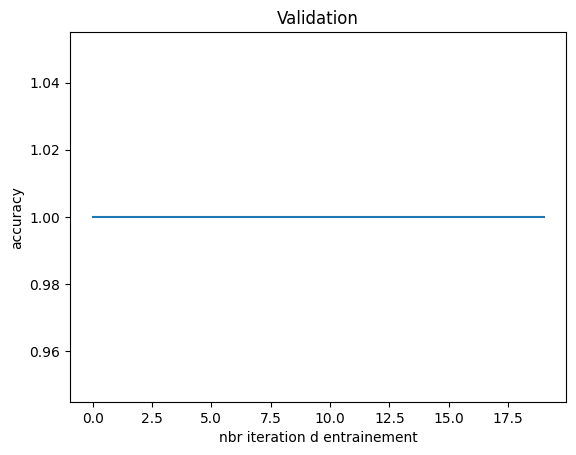

In [13]:
plt.plot(val_score_t)
plt.title('Validation')
plt.ylabel('accuracy')
plt.xlabel('nbr iteration d entrainement')

In [14]:
start = time.time()
y_predict = model.predict(X_test)
score_test=model.score(X_test, y_test)
print (" Score test: "+str (score_test) )
end = time.time()
predict_time = end  - start

 Score test: 0.9995119272771643


###  Evaluation DT

In [15]:
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_predict, average='weighted') 
print('temps entrainement: '+ str(training_time))
print('temps prediction: '+ str(predict_time))
print("Exactitude de DT: {}".format(accuracy_score(y_test,y_predict)))
print('Précision de DT: '+(str(precision)))
print('Taux de détection de DT: '+(str(recall)))
print('F1-score de DT: '+(str(fscore)))
print("ERROR SCORE : {}".format(1-accuracy_score(y_test,y_predict)))

temps entrainement: 416.7665295600891
temps prediction: 0.023996829986572266
Exactitude de DT: 0.9995119272771643
Précision de DT: 0.9995119272771643
Taux de détection de DT: 0.9995119272771643
F1-score de DT: 0.9995119272771643
ERROR SCORE : 0.00048807272283568626


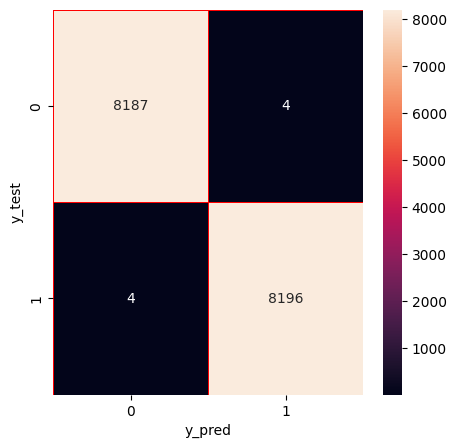

In [16]:
cm=confusion_matrix(y_test,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()